**Problem Statement 1:**

1) How-to-count-distance-to-the-previous-zero

For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position

Consider a DataFrame df where there is an integer column {'X'[7,2,0,3,4,2,5,0,3,4]}

**The values should therefore be [1,2,0,1,2,3,4,0,1,2]. Make this a new column 'Y'.**

    import pandas as pd

    df = pd.DataFrame({'X':[7,2,0,3,4,2,5,0,3,4]})

In [9]:
import pandas as pd
df = pd.DataFrame({'X':[7,2,0,3,4,2,5,0,3,4]})

x = (df['X'] != 0).cumsum()
y = x != x.shift()
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()
print(df)

   X    Y
0  7  1.0
1  2  2.0
2  0  0.0
3  3  1.0
4  4  2.0
5  2  3.0
6  5  4.0
7  0  0.0
8  3  1.0
9  4  2.0


2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.

In [26]:
import datetime as dt
import pandas as pd
import numpy as np
from pandas.tseries.offsets import *

Bday_index = pd.date_range('2015-01-01', '2015-12-31', freq=BDay())
series_date_index = pd.Series(np.random.randint(low=1, high=100, size=261),index = Bday_index)
print(series_date_index)

2015-01-01    67
2015-01-02    75
2015-01-05     7
2015-01-06    96
2015-01-07    11
2015-01-08     8
2015-01-09    25
2015-01-12    92
2015-01-13    15
2015-01-14    16
2015-01-15    57
2015-01-16    68
2015-01-19    93
2015-01-20    72
2015-01-21    35
2015-01-22    44
2015-01-23     6
2015-01-26    92
2015-01-27    16
2015-01-28    26
2015-01-29     7
2015-01-30    23
2015-02-02    52
2015-02-03     5
2015-02-04    59
2015-02-05    78
2015-02-06     9
2015-02-09    16
2015-02-10    52
2015-02-11    46
              ..
2015-11-20    39
2015-11-23    85
2015-11-24    99
2015-11-25    93
2015-11-26    97
2015-11-27    95
2015-11-30     2
2015-12-01    92
2015-12-02    62
2015-12-03    96
2015-12-04    30
2015-12-07    35
2015-12-08    20
2015-12-09    23
2015-12-10     5
2015-12-11    64
2015-12-14    15
2015-12-15    52
2015-12-16    60
2015-12-17    42
2015-12-18    13
2015-12-21    85
2015-12-22    23
2015-12-23    12
2015-12-24    10
2015-12-25    40
2015-12-28    23
2015-12-29    

3) Find the sum of the values in s for every Wednesday

In [27]:
from datetime import date
import calendar

s = 0
for idx , val in enumerate(series_date_index):
    if (series_date_index.index[idx].strftime("%A") == "Wednesday"):
        s = s + series_date_index[idx]
    
print("s = "+str(s))          

s = 2854


4) Average For each calendar month

In [28]:
series_date_index.groupby(pd.Grouper(freq='M')).mean()

2015-01-31    43.227273
2015-02-28    50.100000
2015-03-31    47.954545
2015-04-30    47.227273
2015-05-31    47.761905
2015-06-30    57.181818
2015-07-31    60.478261
2015-08-31    49.714286
2015-09-30    64.863636
2015-10-31    60.545455
2015-11-30    66.285714
2015-12-31    42.695652
Freq: M, dtype: float64

5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [126]:
df = series_date_index.groupby(pd.Grouper(freq='4MS',label='right')).max()[:3]

print("The highest value in each group of for consecutive calendar months")
print('-'*66)
print(df)
print("The date on which the highest value occurred:")
print('-'*45)
for idx, val in enumerate(df):
    print(val)
    for idx1 , val1 in enumerate(series_date_index):
        if(val == val1):
            print(str(series_date_index.index[idx1])+" , "+str(series_date_index[idx1]))
            

The highest value in each group of for consecutive calendar months
------------------------------------------------------------------
2015-05-01    97.0
2015-09-01    99.0
2016-01-01    99.0
dtype: float64
The date on which the highest value occurred:
---------------------------------------------
97.0
2015-03-11 00:00:00 , 97
2015-11-26 00:00:00 , 97
99.0
2015-07-01 00:00:00 , 99
2015-11-24 00:00:00 , 99
99.0
2015-07-01 00:00:00 , 99
2015-11-24 00:00:00 , 99


**Problem Statement 2:**

Read the dataset from the below link

https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

**Questions:**

1) Delete unnamed columns

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"
df = pd.read_csv(url)
print("Before removing the unnamed column \n",'-'*33)
print(df.head())
df1 = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print("After removing the unnamed column \n",'-'*32)
print(df1.head())

Before removing the unnamed column 
 ---------------------------------
   Unnamed: 0     Id     Name  Year Gender State  Count
0       11349  11350     Emma  2004      F    AK     62
1       11350  11351  Madison  2004      F    AK     48
2       11351  11352   Hannah  2004      F    AK     46
3       11352  11353    Grace  2004      F    AK     44
4       11353  11354    Emily  2004      F    AK     41
After removing the unnamed column 
 --------------------------------
      Id     Name  Year Gender State  Count
0  11350     Emma  2004      F    AK     62
1  11351  Madison  2004      F    AK     48
2  11352   Hannah  2004      F    AK     46
3  11353    Grace  2004      F    AK     44
4  11354    Emily  2004      F    AK     41


2) Show the distribution of male and female

F    558846
M    457549
Name: Gender, dtype: int64


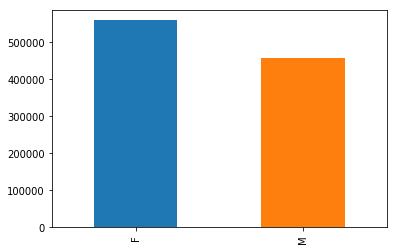

In [76]:
import matplotlib.pyplot as plt 

%matplotlib inline 
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot(kind='bar')

3) Show the top 5 most preferred names

In [118]:
print(df['Name'].value_counts().head(5))

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64


4) what is the median name occurrence in the dataset

In [3]:
a = df['Name'].value_counts().median()
print(a)

8.0


5) Distribution of male and female born count by states

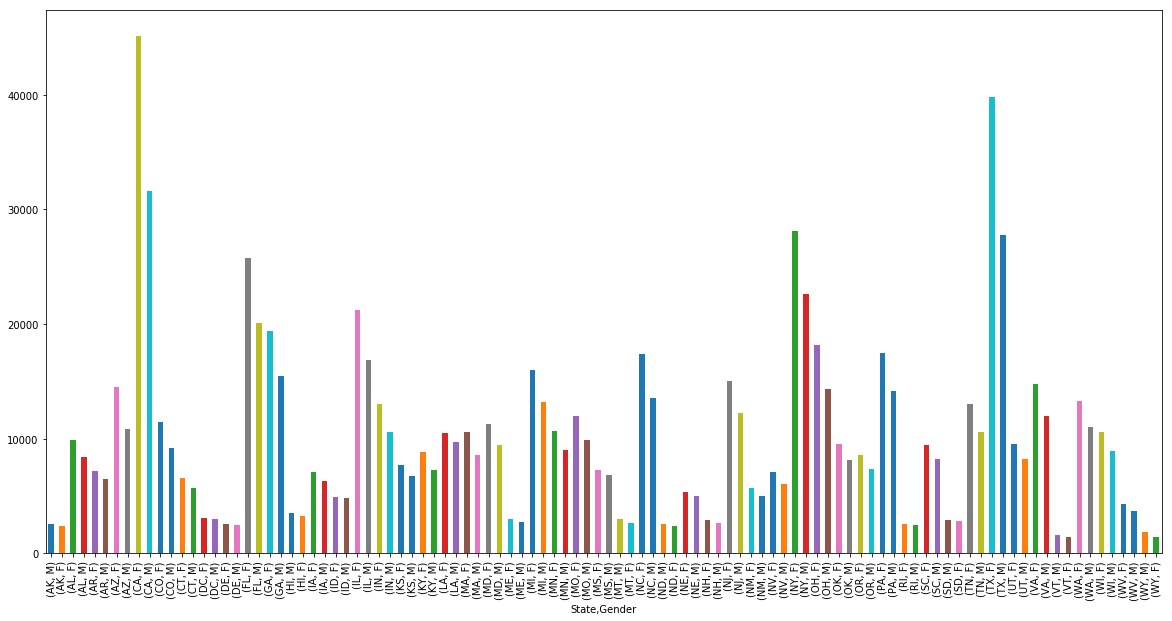

In [116]:
df.groupby(['State'])['Gender'].value_counts().plot(figsize=(20,10),kind='bar')